---

# **Módulo** | Python: Projeto Final`
---
 Mario Carvalho

### **Tópicos**

<ol type="1">
  <li>Descritivo do problema</li>
  <li>Carregamento dos modulos</li>
  <li>Exploração de dados</li>
  <li>Transformação e limpeza de dados</li>
  <li>Visualização de dados</li>
  <li>Insights</li>
</ol>


---

## 1\. Descritivo do problema

Estuda-se neste projeto como variável resposta a condição adimplente (**default = 0**) ou inadimplente (**default = 1**). Utilizou-se um banco de dados fictícios, simulando uma operadora de crédito. O banco de dados bruto possui **10127 entradas** distribuídas em **16 colunas** com variáveis categóricas e numéricas. 

O banco de dados possui 16 variáveis: **id, default, idade, sexo, dependentes, escolaridade, estado civil, salário anual, tipo de cartão, meses de relacionamento, quantidade de produtos, interações em 12 meses, meses inativos em 12 meses, limite de crédito, valor de transações em 12 meses e quantidade de transações em 12 meses**. 

De todas as variáveis presentes no banco, utilizou-se como variável resposta a coluna **default** e como variáveis idependentes **quantidade de transações em 12 meses, valores de tranações em 12 meses, idade, quantidade de produtos**.


## 2\. Carregamento dos módulos

Nesta etapa do projeto carrega-se os módulos que serão usados durante o estudo.

In [2]:
#third party imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3\. Exploração dos dados

Avalia-se o banco de dados, fazendo uma busca por dados faltantes, dados inconsistentes.

In [4]:
#Carregamento do banco de dados
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [5]:
#Descritivo dados categoticos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


***Há um inconsistência nos dados de quantidade de transações e valores de transações, pois ambos são numéricos, mas estão sendo reconhecidos como categóricos.***

In [6]:
#Resumo estatistico descritivo dos dados numéricos
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [7]:
#Varedura em busca de dados faltantes
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [8]:
#Função para validação da quantidade de dados faltantes
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

**A quantidade de dados faltantes nas colunas (escolaridade,estado civil e salario anual) foi respectivamente de 1519, 749, 1112**

## 4\. Transformação e limpeza de dados

Limpa-se o banco de dados removendo as inconsistencias e dados faltantes encontradas na etapa anterior, transformando variaveis.

In [9]:
#Transformação dos dados de valores e quantidade de transações em 12 meses de string -> float
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [10]:
#Limpeza dos dados faltantes
df.dropna(inplace=True)

## 5\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

In [11]:
#Set a preferencia do estilo do gráfico
sns.set_style("whitegrid")

In [12]:
#Montagem do banco de dados dos clientes adimplentes
df_adimplentes = df[df['default'] == 0]

In [13]:
#Montagem do banco de dados dos clientes inadimplentes
df_inadimplentes = df[df['default'] == 1]

 **a) Quantidade de Transações nos Últimos 12 Meses**

figura(1)


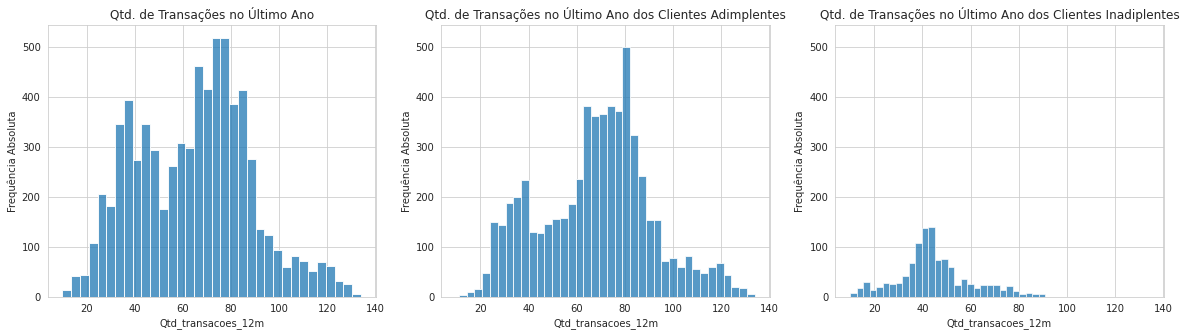

In [14]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano dos Clientes Adimplentes', 'Qtd. de Transações no Último Ano dos Clientes Inadiplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplentes, df_inadimplentes]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()
print('figura(1)')

 **b) Valor de Transações nos Últimos 12 Meses**

figura(2)


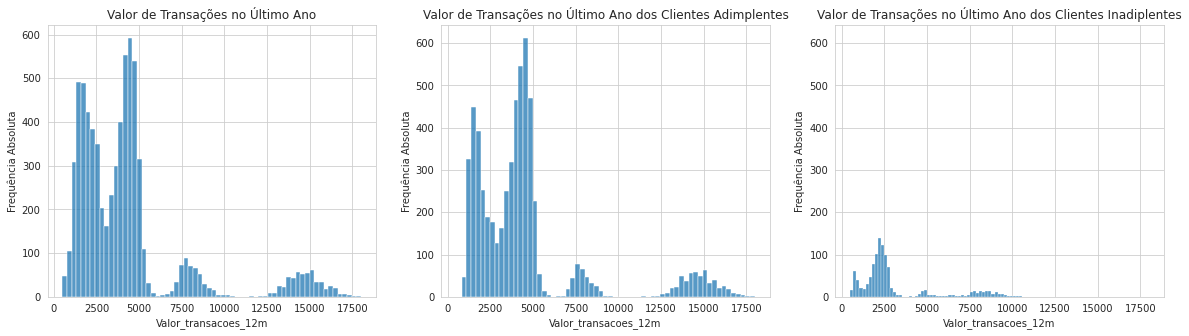

In [13]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor de Transações no Último Ano', 'Valor de Transações no Último Ano dos Clientes Adimplentes', 'Valor de Transações no Último Ano dos Clientes Inadiplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplentes, df_inadimplentes]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()
print('figura(2)')

**c) Quantidade de produtos**

figura(3)


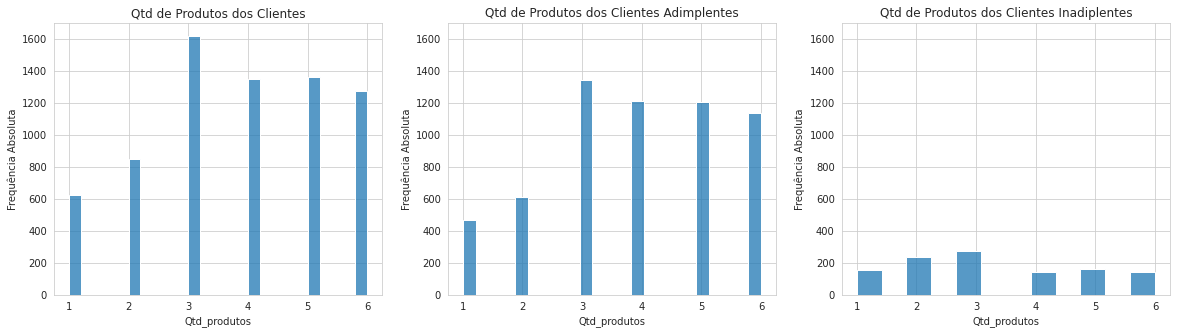

In [17]:
coluna = 'qtd_produtos'
titulos = ['Qtd de Produtos dos Clientes', 'Qtd de Produtos dos Clientes Adimplentes', 'Qtd de Produtos dos Clientes Inadiplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplentes, df_inadimplentes]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()
print('figura(3)')

figura(4)


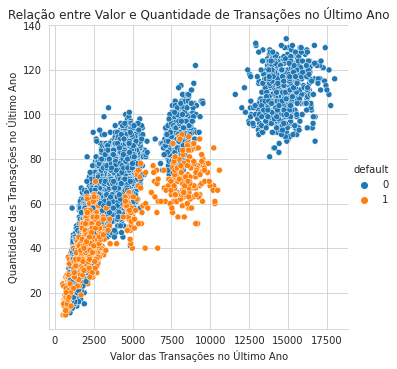

In [18]:
f = sns.relplot(
    data=df,
    x='valor_transacoes_12m', y='qtd_transacoes_12m', hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )
print('figura(4)')

figura(5)


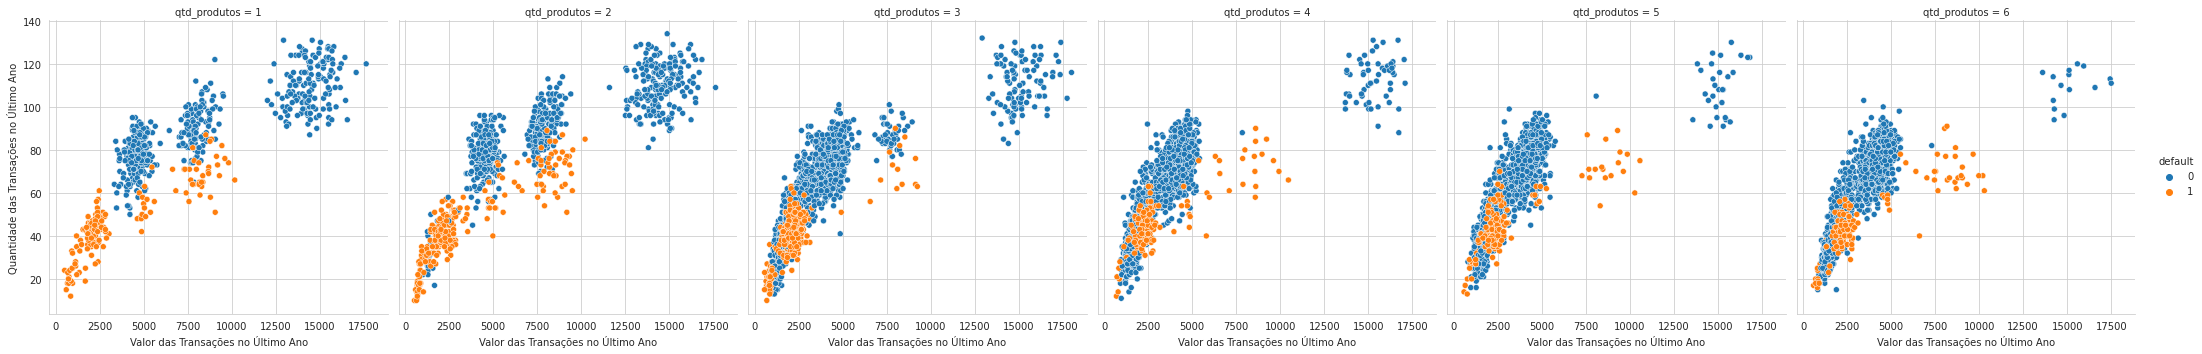

In [19]:
f = sns.relplot(
    data=df,
    x='valor_transacoes_12m', y='qtd_transacoes_12m', col='qtd_produtos', hue='default')
_ = f.set( 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )
print('figura(5)')

## 6\. Insights

**As figuras 1, 2, 3 ** apresentam o histograma das variáveis **quantidade de transações, valor das transações e quantidade de produtos**. 

Na figura 4 que exite uma relação forte entre as variáveis quantidade e valor de transações. Observa-se que quanto maior o valor de transações girando em torno de 11 mil e com quantidade de transações em torno de 90, menos provável do cliente se tornar indadiplente. 

Na figura 5 observa-se que clientes que possuem apenas 1 produto contratado e com valores de transações abaixo de 3 mila probabilidade do cliente se tornar inadiplente é muito alta.

Observa-se também na figura 5 que clientes com pelo menos 3 produtos contratados e com valores de transações acima de 3 mil, possuem uma probabilidade pequena de se tornarem inadiplentes. 